# Student performance Indiacator

## Life cycle of Machine Learning Project
- Understanding the problem Statements
- Data collection
- Data checks to performs
- Exploratary data anaylysis
- Data Pre-processing
- Choose best model

## 1) Problem Statement
- This project understands how the student perfoemance (test score) is affected by other variables such as gender ,ethenicity,parental level of education , lunch and test preparation course

## 2) Data colection
- dataset source - Kaggle 
- the dataset contains of 8 columns and 1000 rows 

## 2.1 importa Data and required packages
- Importing pandas , numpy , Matplotlib,Seaborn and warning Librabry 

In [7]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## IMporting Dataset

In [9]:
df =pd.read_csv('study_performance.csv')

## Show top 5 records

In [10]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## shape of dataset

In [11]:
df.shape

(1000, 8)

## data set information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3. Data checks to perform
- check missing values
- check duplicates
- check datatype 
- check the number of unique values of each column 
- check the statistics of dataset
- check various categories present in the different categorical column



### 3.1 checking missing values

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### ther is no missing values 

### check duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### check the number of unique values of each column

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### check statistics of the datasset

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insights
- from above description of numerical data, all mean are very close to each other - between 66 and 68.05
- all standard deviation are also close - between 14.6 and 15.19
- while there is minimum score 0 for math, for writing minimum  is much higher = 10 and for reading myet higher = 17

### exploring the data

In [18]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
print("categorins in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("categoris i 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("categoris i 'parental_level_of_education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("categoris i 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("categoris i 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())


categorins in 'gender' variable:    ['female' 'male']
categoris i 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categoris i 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categoris i 'lunch' variable:    ['standard' 'free/reduced']
categoris i 'test_preparation_course' variable:    ['none' 'completed']


In [20]:
# define numerical and categorical feature 
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns

print("we have {} numerical features : {}".format(len(numeric_feature), numeric_feature))

print("we have {} categorical features : {}".format(len(categorical_feature),categorical_feature))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']



### adding columns for "total score" and "average score "

In [21]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head(3)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [22]:
reading_full = df[df['reading_score']==100]['average'].count().item()
math_full = df[df['math_score']==100]['average'].count().item()
writing_full = df[df['writing_score']==100]['average'].count().item()

print("no. of student wth full marks in math: ",{math_full})
print("no of student with full writing score ",{writing_full})
print("no. of student with full reading score ",{reading_full})

no. of student wth full marks in math:  {7}
no of student with full writing score  {14}
no. of student with full reading score  {17}


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count().item()
math_less_20 = df[df['math_score'] <= 20]['average'].count().item()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count().item()

print("no. of student whose reading score less than 20 : ",{reading_less_20})
print("no. of student whose math score less than 20 : ",{math_less_20})
print("no. of student whose wrriting score less than 20 : ",{writing_less_20})

no. of student whose reading score less than 20 :  {1}
no. of student whose math score less than 20 :  {4}
no. of student whose wrriting score less than 20 :  {3}


### insights
- from above values we get students have performaed worst in maths
- best perforamnce is in reading section

### 4. Exploring data (visulization)

- visulaize average score distribution to make some conclusion
- histogram
- kernel distibution (KDE)


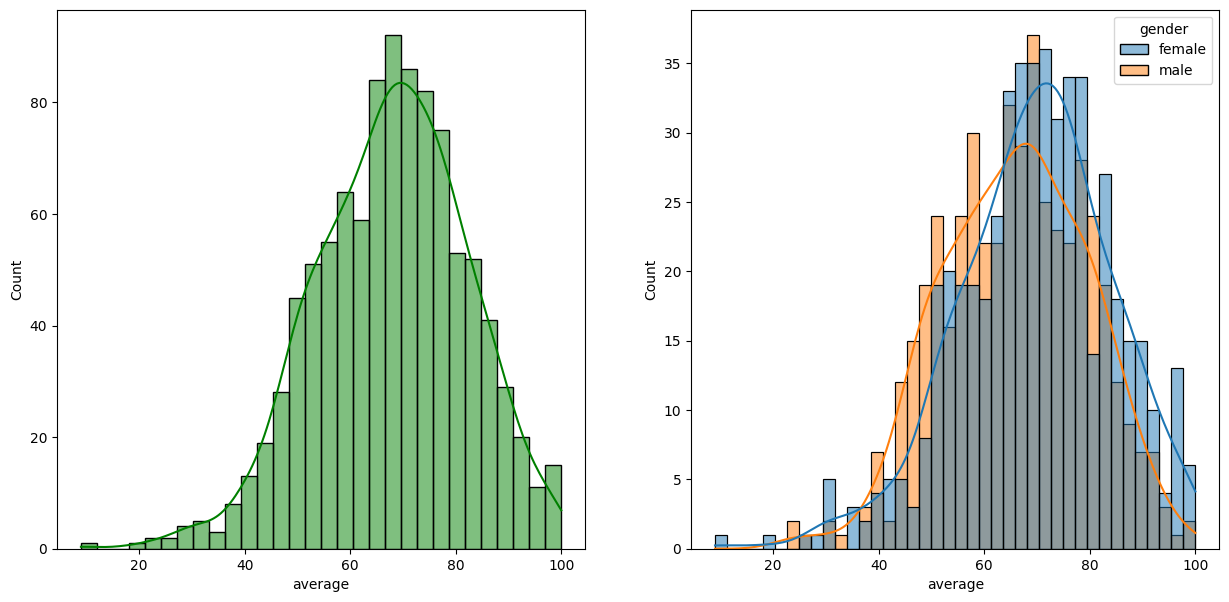

In [24]:
fig,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',hue='gender',bins=40,kde=True)
plt.show()


### insight 
- feamale students tends to perform better than male students

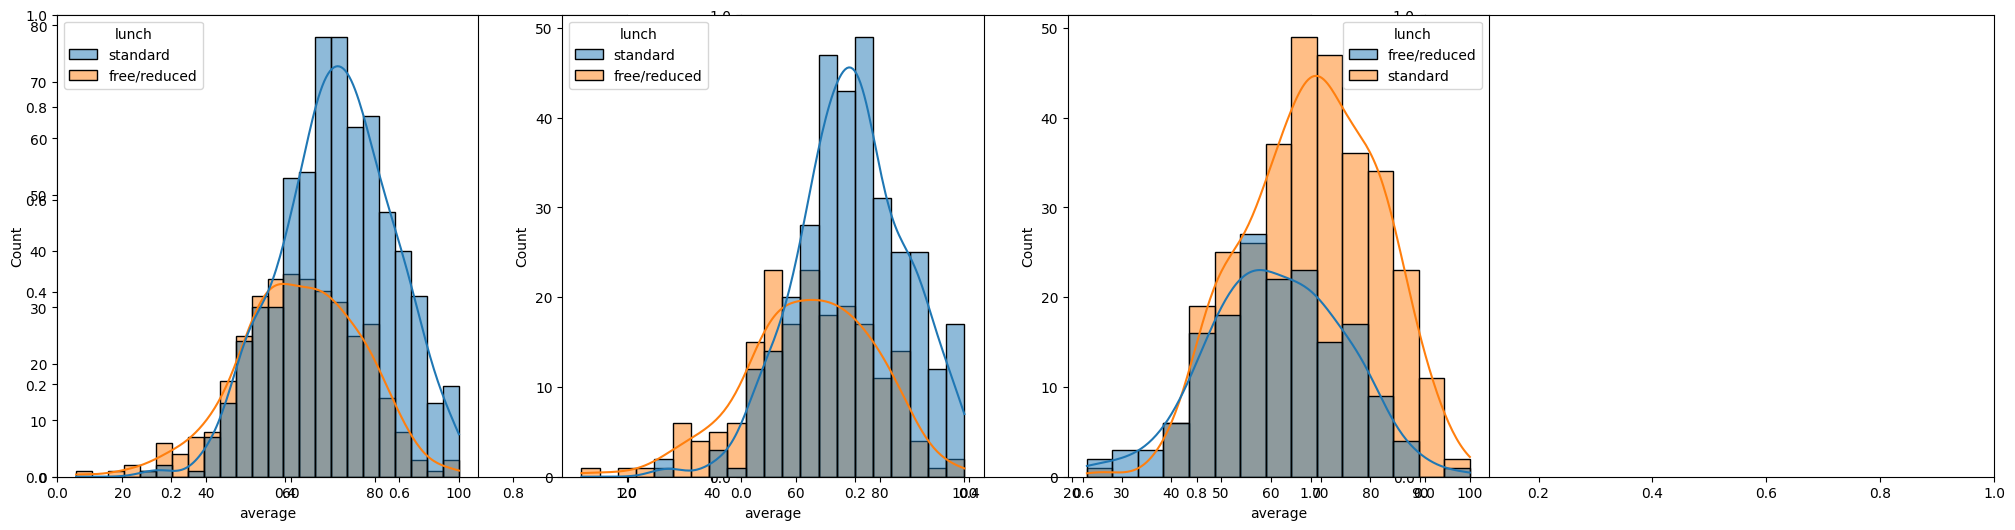

In [25]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'],x='average',kde=True,hue='lunch')

plt.show()

### insights
- standard lunch helps perform well in exams 
- standard lunch helps well in exams be it a male or female 

In [26]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


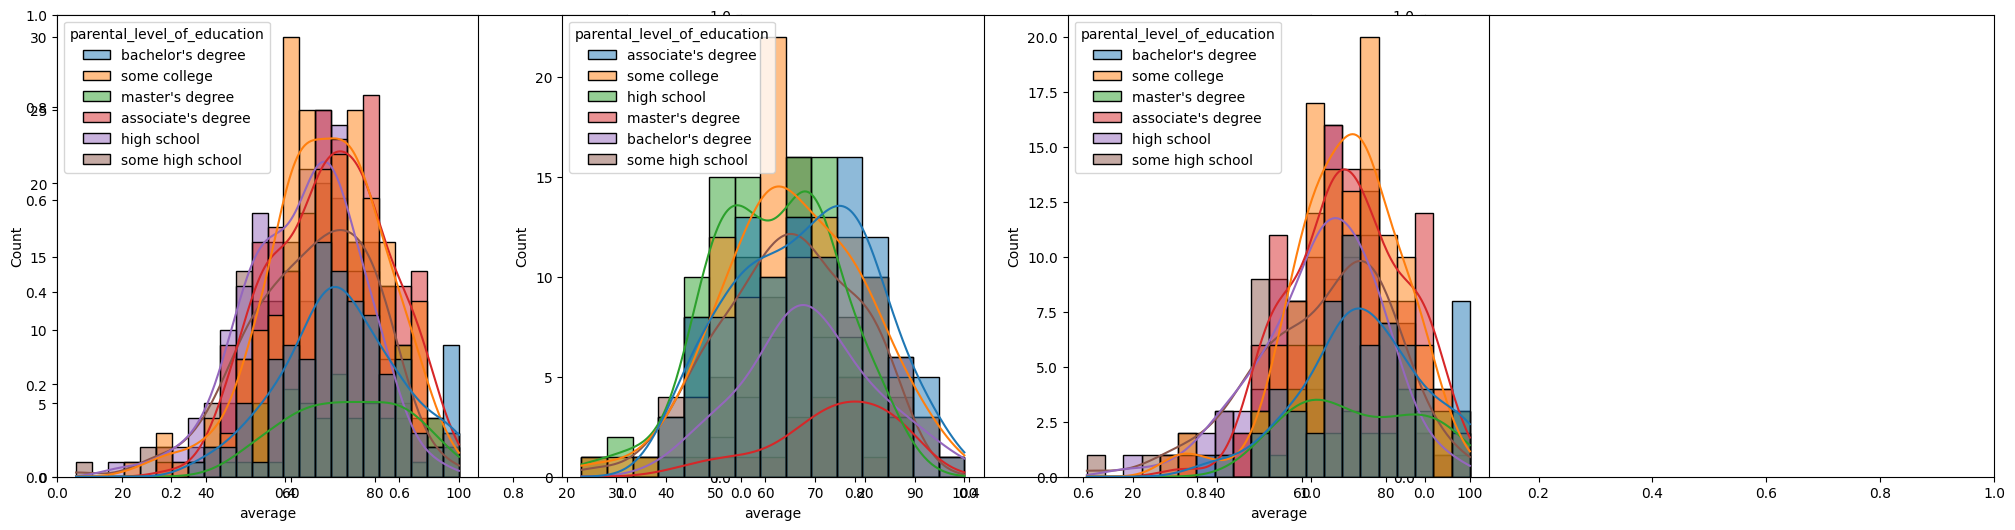

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x='average',kde=True,hue="parental_level_of_education")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue="parental_level_of_education")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental_level_of_education')

plt.show()

### insights
- ingnral parent's education don't help student perform well in exam 
- 2nd plot shows that parent whose education is of associate's degree pr master's degreee their male child performm well in exam 
- 3rd plot we can see there is no effect of parent's education on female child 

## 4.2 Maximum score of students in all three subjects

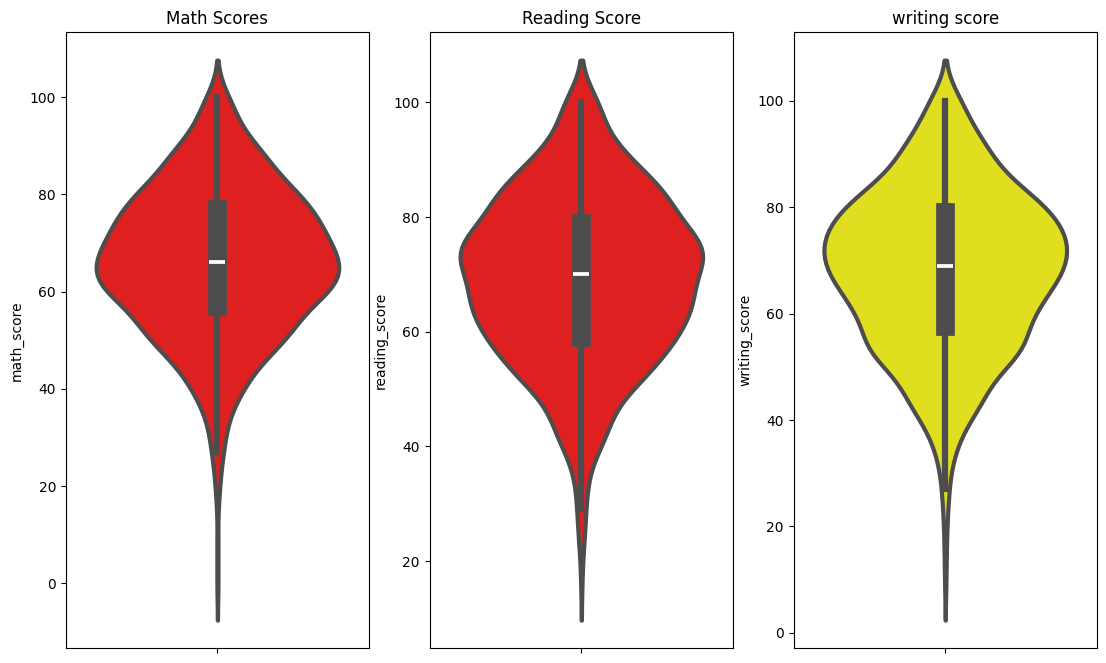

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data = df,color ='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,3)
plt.title("writing score")
sns.violinplot(y='writing_score',data=df,color='yellow',linewidth=3)
plt.show()


### insights
- from the above three plots its clearly visible that most of the student score between 60-80 in maths in reading and writing ost of the, score from 50 -80

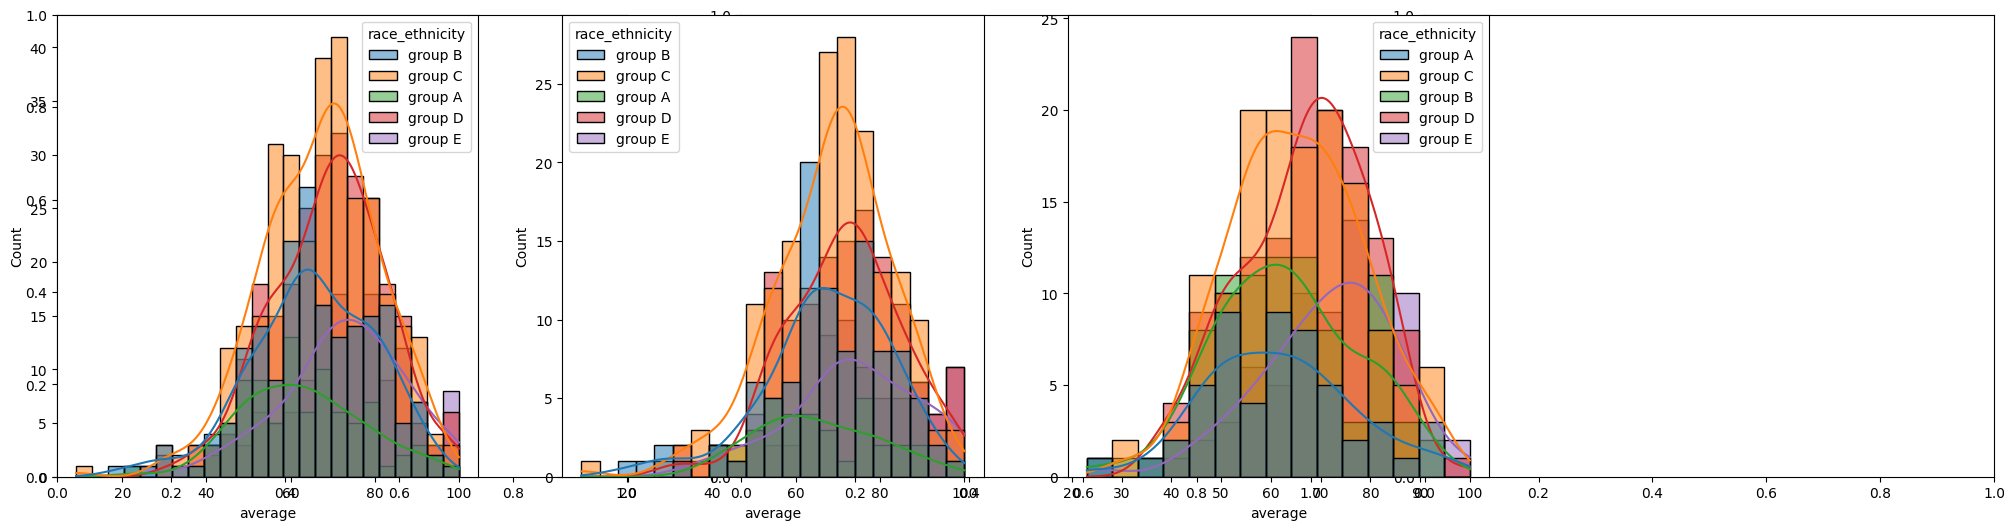

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df, x = 'average' , kde= True,hue = 'race_ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x= 'average',kde=True,hue = 'race_ethnicity')
plt.subplot(143)
axx = sns.histplot(data= df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### insight
- stuudents of group A and group B to perfrm poorly in exam
- students of group A and Group B to perform pooorly in exam irrespective of whether of male or female 

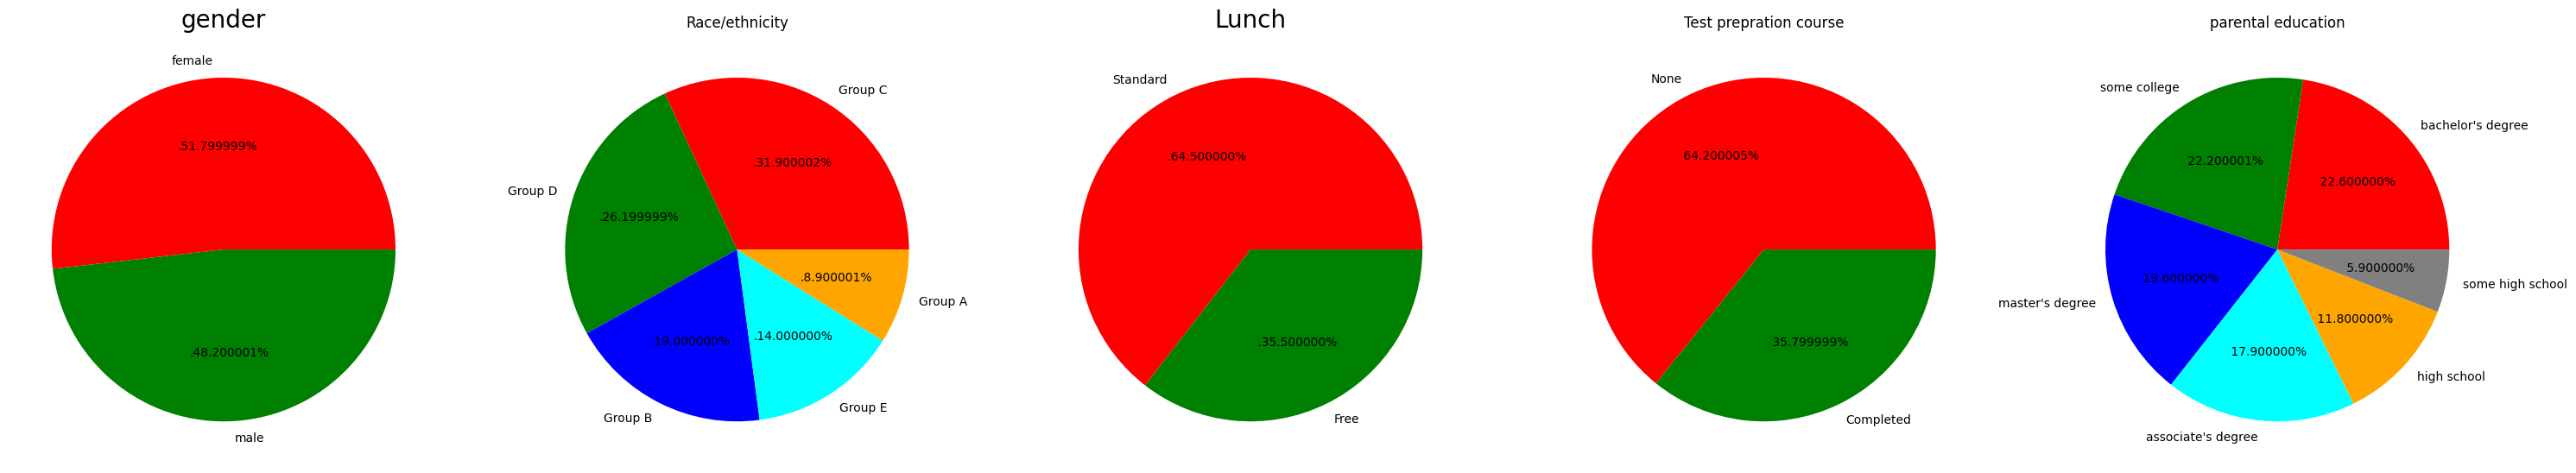

In [30]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'female', 'male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('gender',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels= labels,autopct = '.%2f%%')
plt.title('Race/ethnicity')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels= 'Standard','Free'
color= ['red','green']

plt.pie(size,colors=color,labels=labels,autopct= ' .%2f%%' )
plt.title('Lunch',fontsize=20)

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct=' %2f%%')
plt.title('Test prepration course')


plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color , labels=labels,autopct= ' %2f%%')
plt.title('parental education')

plt.tight_layout()
plt.grid()
plt.show()


### insights
- number of male and female is almost equal
- number students are greatest in group c
- number of studetns who have standard lunch are greated
- number of student who have standard lunch are greater
- number of student who have not enrolled in any test preapration course is greater 
- number of students whose parental education is 'some college' is greated followed by 'Associate's degree '

### 4.4 Feature Wise Visualizatioin

### Gender Column
- How i distribution of gender
- is gender has any impact on student's performance


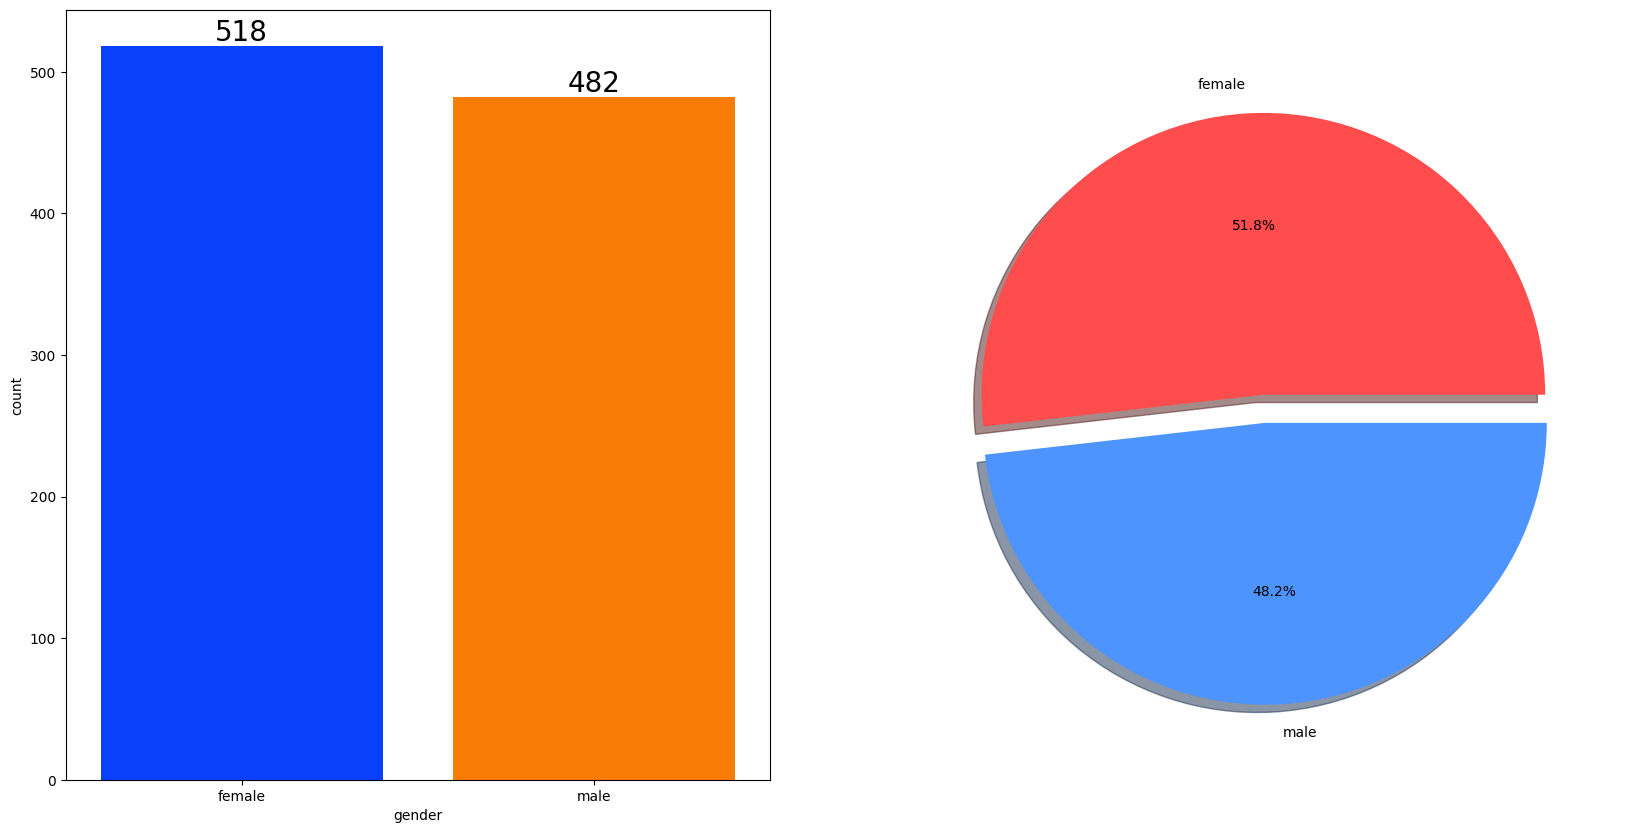

In [31]:
f, ax = plt.subplots(1,2,figsize=(20,10))

# Countplot
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie Chart
ax[1].pie(
    x=df['gender'].value_counts(),
    labels=df['gender'].value_counts().index,
    explode=[0,0.1],          # only two values
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d','#4d94ff']
)

plt.show()


### insights
- gender has balannced data with female students are 518 and male students 482

### Bivariate Analysis 

In [32]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [33]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


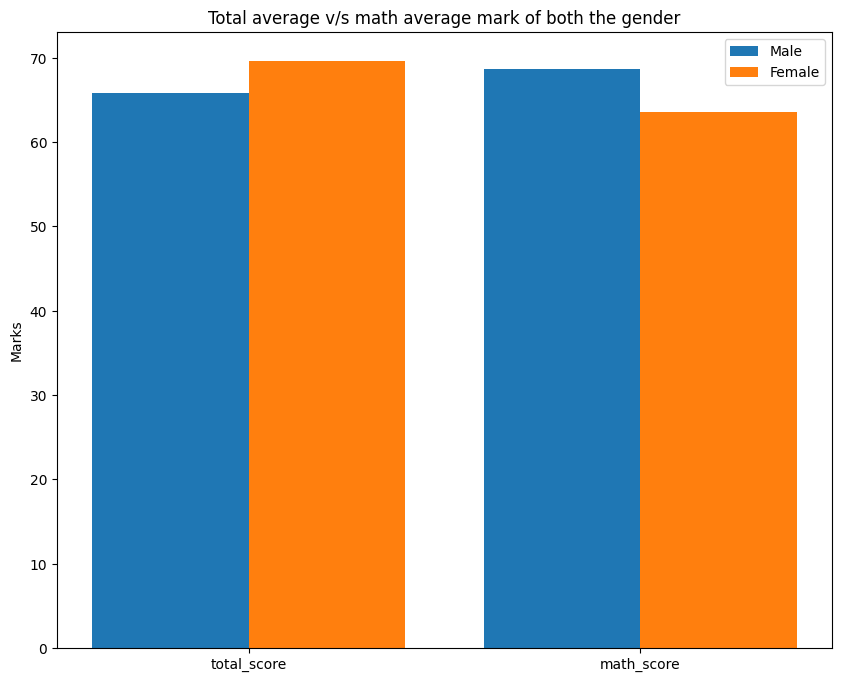

[np.float64(69.56949806949807), np.float64(63.633204633204635)]

In [ ]:
plt.figure(figsize=(10,8))

x = ['total_score','math_score']

female_score = [gender_group['average'][0],gender_group['math_score'][0]]
male_score = [gender_group['average'][1],gender_group['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis -0.2,male_score,0.4,label =  "Male")
plt.bar(x_axis+0.2,female_score,0.4,label='Female')

plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('Total average v/s math average mark of both the gender')
plt.legend()
plt.show()



### insights
- on an average femalles have a better overall score than ,en
- whereas males have scored higher in maths

### Race/ethnicity column
- how is group wise distipbution
- is race.ethnicity has any impact on students's performance?

### univariate analysis(how is gropup wise distribution?)

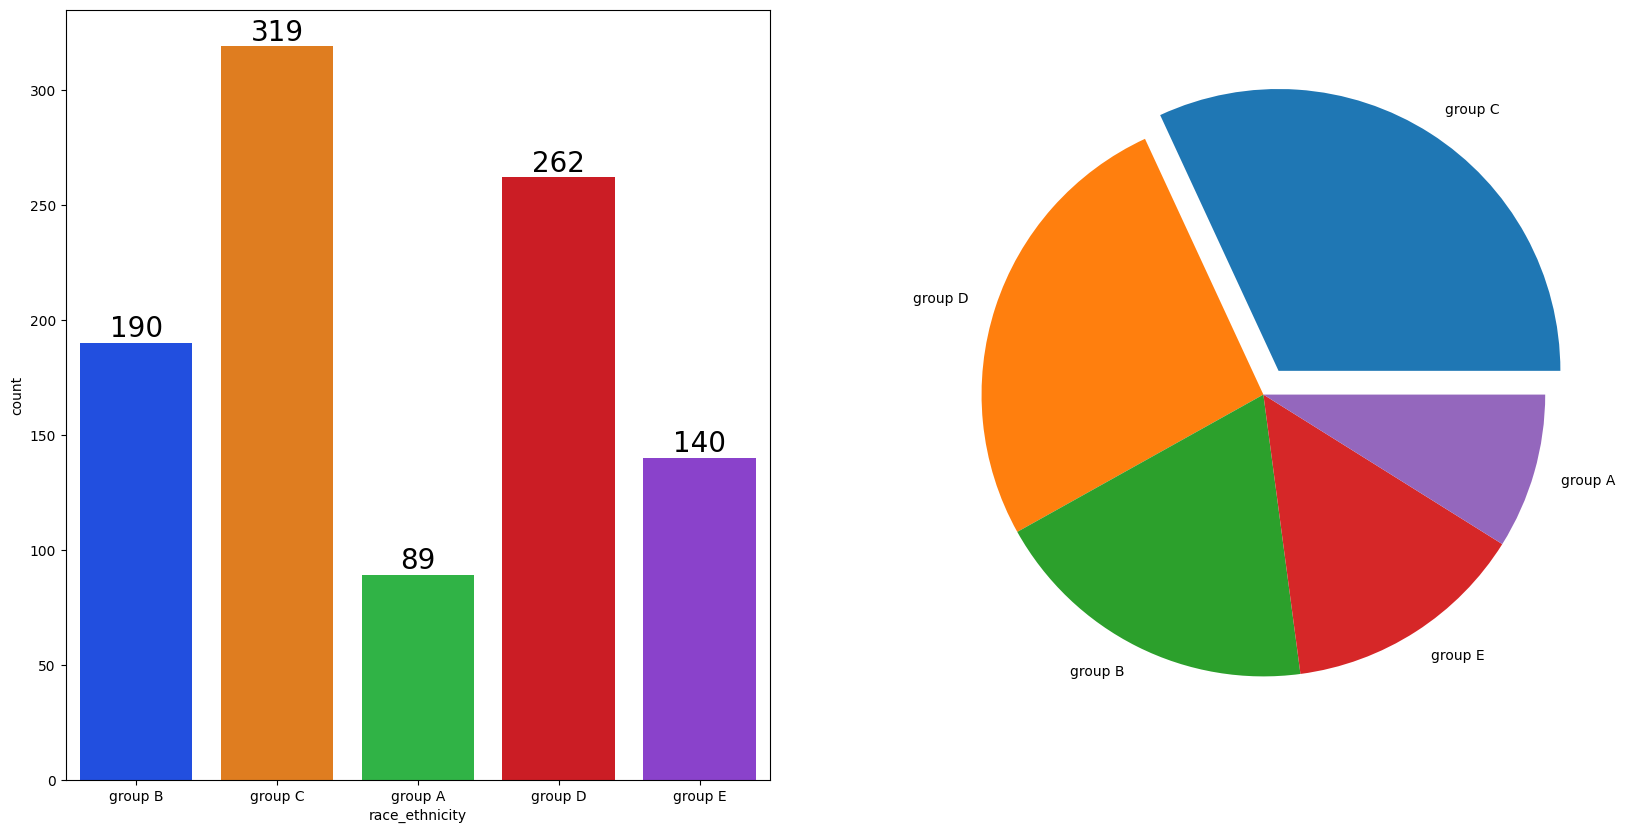

In [40]:
f,ax = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0])
plt.show()
    

### insights
- most of the students belonging from group c/ group d
- Lowest number of students belong to group A

## Bivariate analysis( Is race/ethnicity has any impact on student's performance)


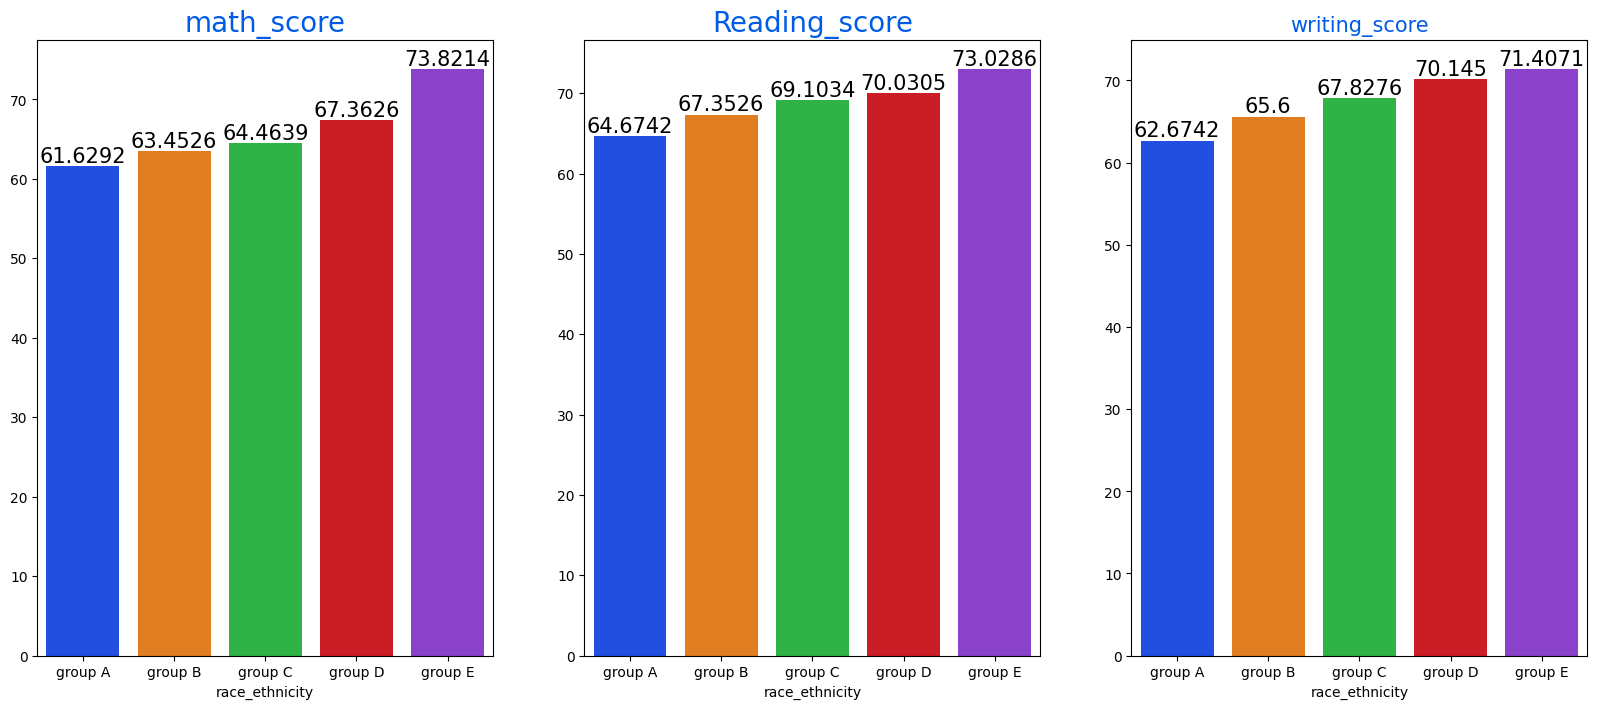

In [50]:
group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette= 'bright',ax= ax[0])
ax[0].set_title('math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='bright',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    
sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='bright',ax=ax[2])
ax[2].set_title('writing_score',color='#005ce6',size=15)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)



### insights
- gropup E students have scored the highest marks
- group A students have scored the lowest marks
- students from a lower socioeconomic status have a loweravg in all course subject

### paretntal level education impact
- what is education background of the students' parent?
- is parental education has any impact on student's performance?

## univariate analysis(what is education backgruond of students's parent)

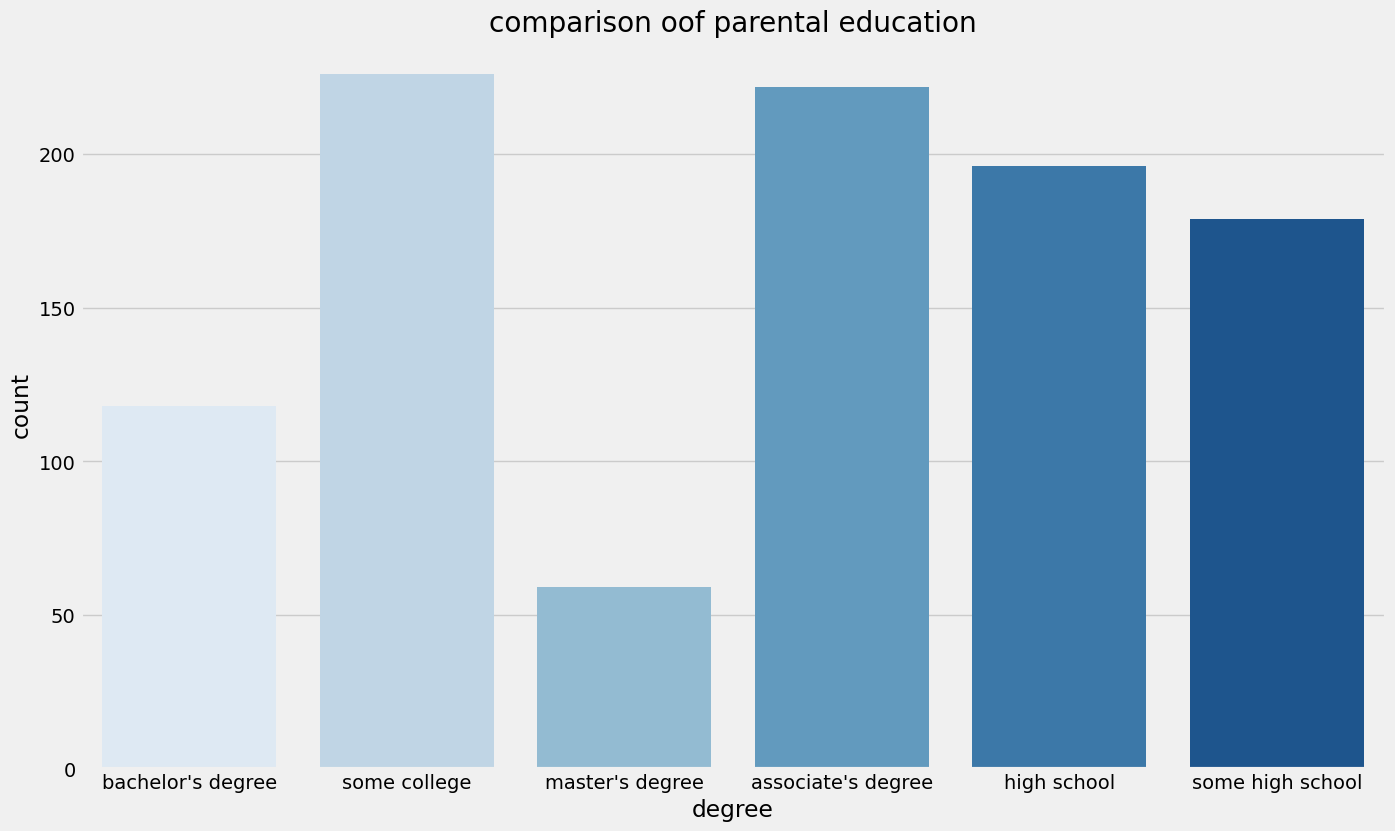

In [52]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues')
plt.title('comparison oof parental education')
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

### insights
- large no. of parents are from some college
## bivariate analysis( is parental education haveany studet's education)

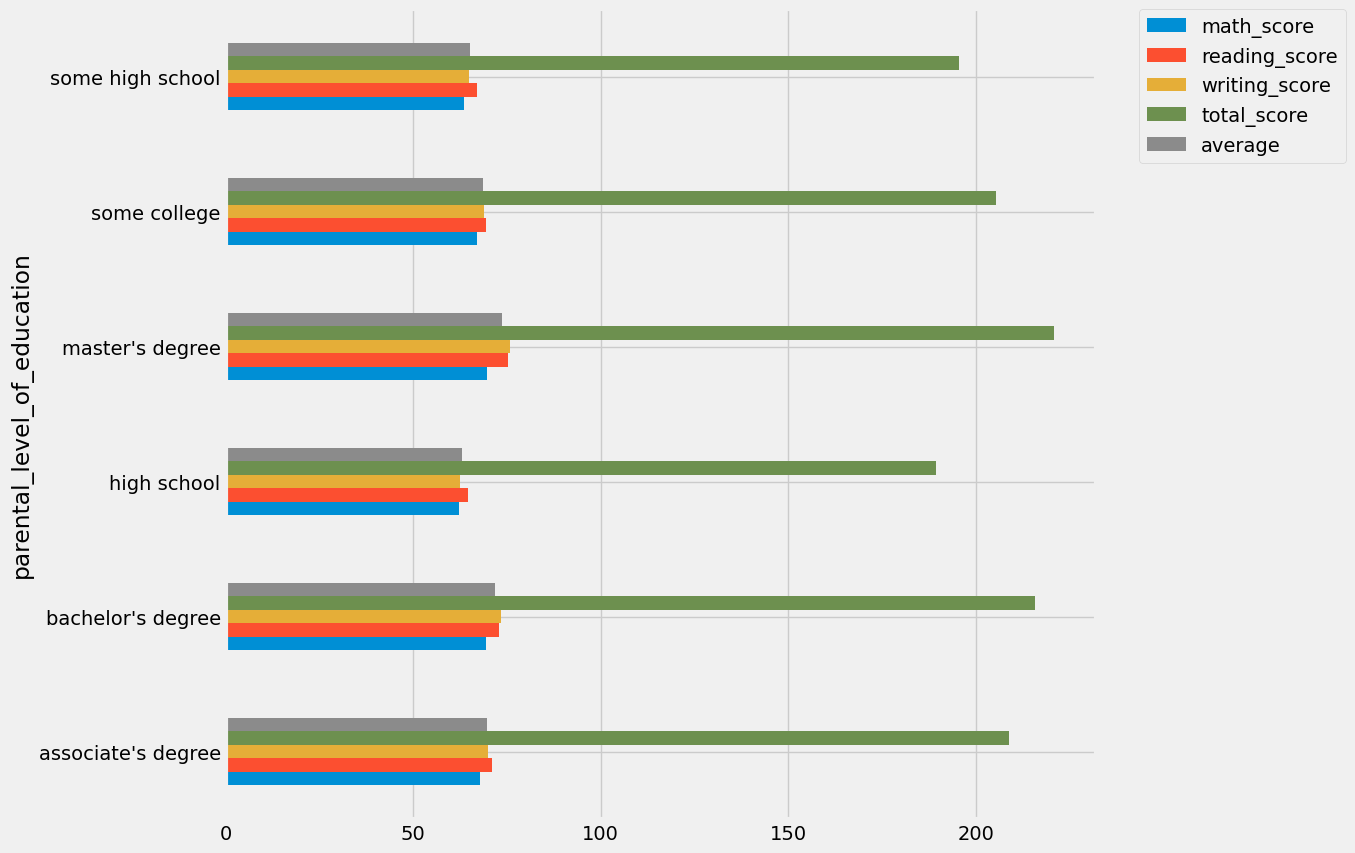

In [56]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

## insights
- the scores of students whose parents possses master and bachelor level education are higher than others

### lunch  cloumn
- whcich type of lunch most common among students
- what effect of lunch type on test result

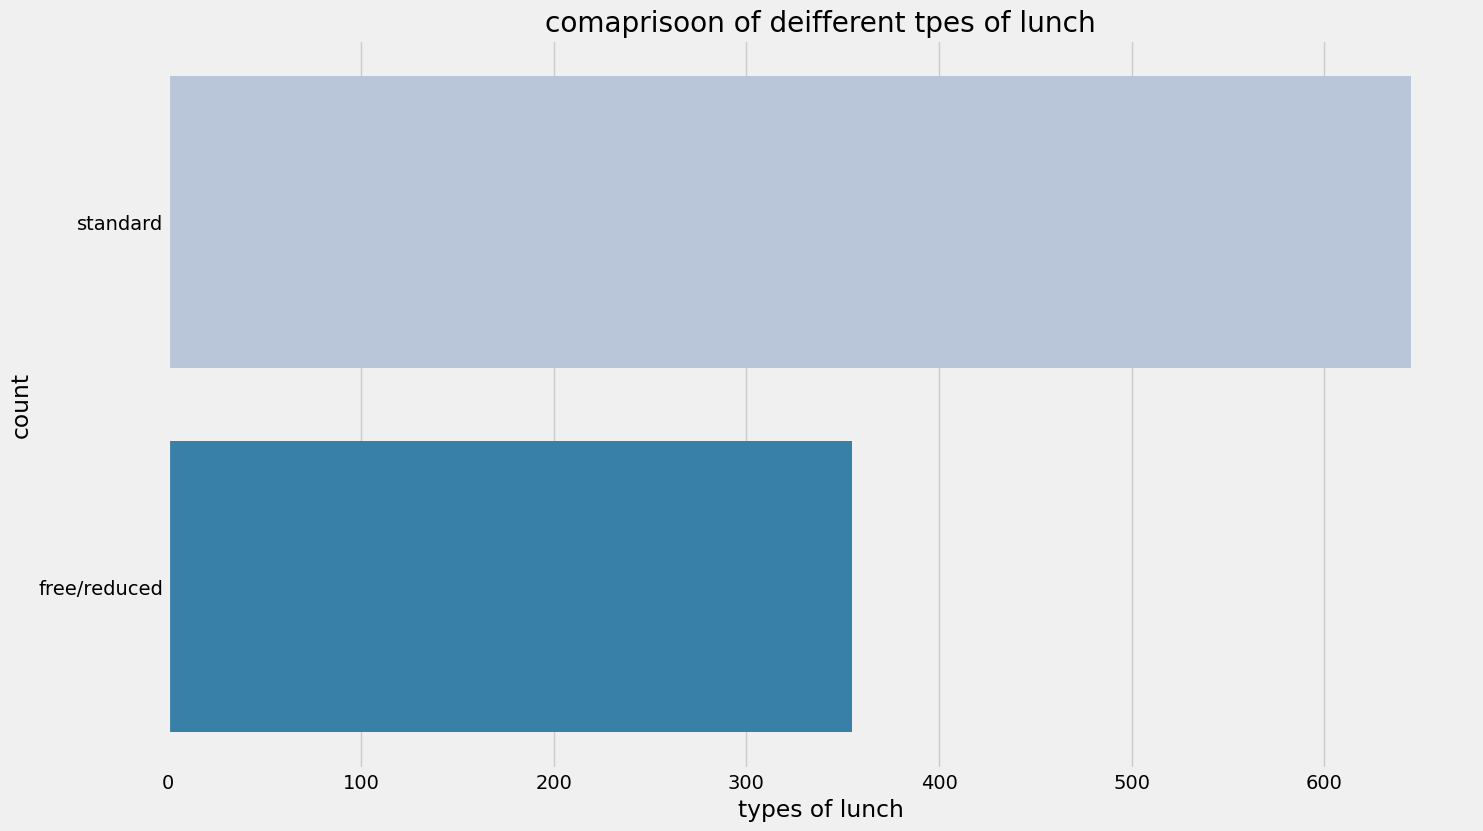

In [62]:
# plt.rcParams(['figure.figsize']) =(15,9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('comaprisoon of deifferent tpes of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


### insights
- students being served Standard lunch more than free lunch

### BIVARIAT ANALYSIS(is lunch has any impact on studetns performance)

In [80]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


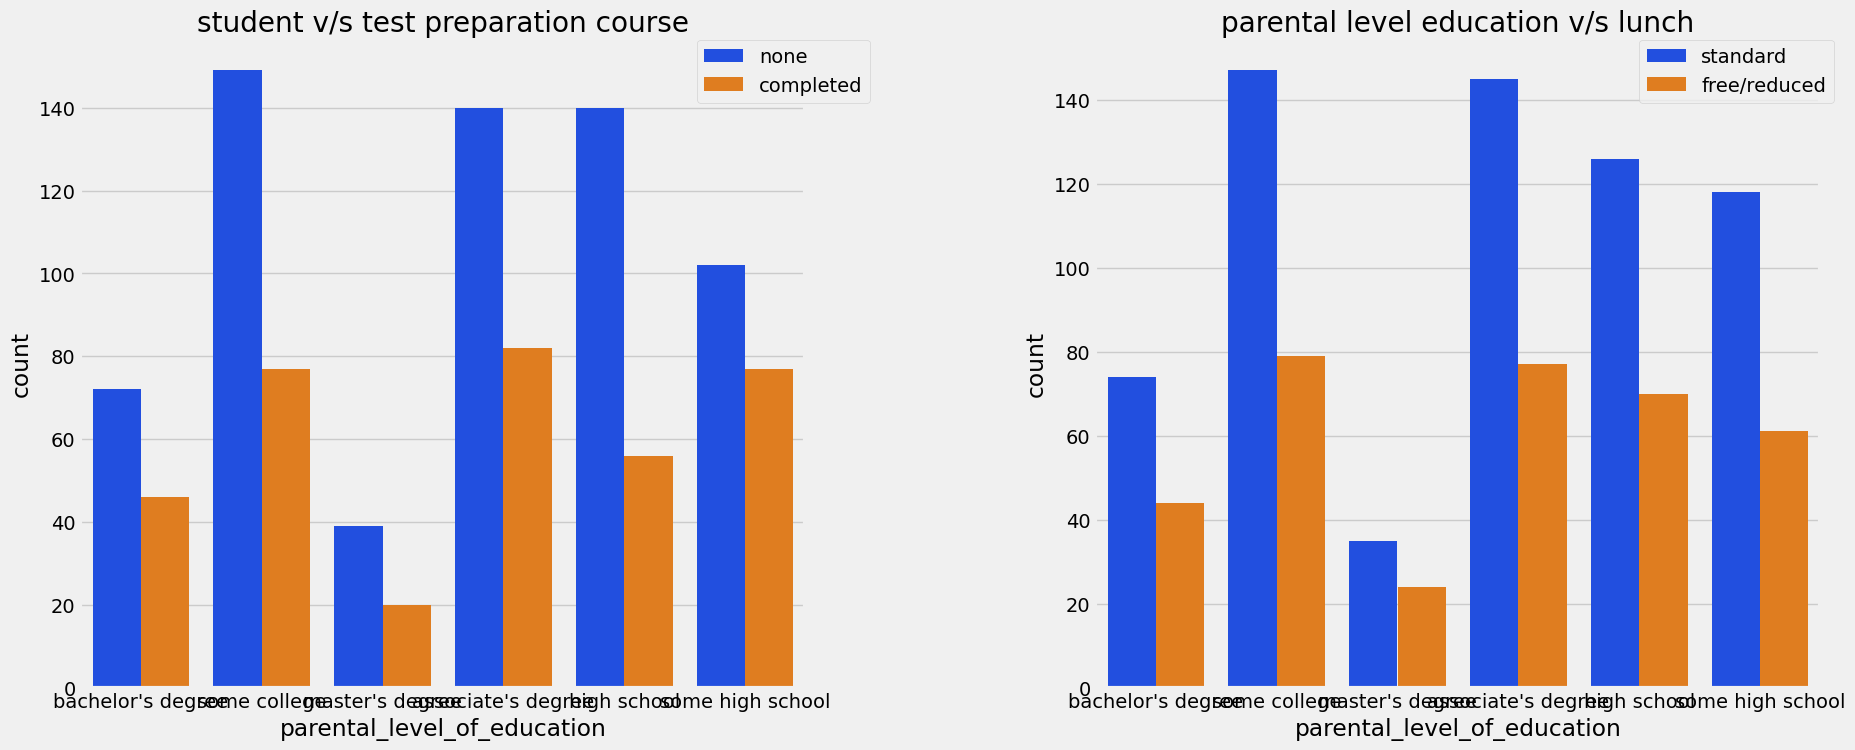

In [76]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',ax=ax[0])
ax[0].set_title('student v/s test preparation course', color='black')
ax[0].legend(bbox_to_anchor=(0.85,1),loc=2,borderaxespad=0.)

sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',ax=ax[1])
ax[1].set_title('parental level education v/s lunch')
ax[1].legend(bbox_to_anchor=(0.75,1),loc=2,borderaxespad=0.)
plt.subplots_adjust(wspace=0.4)

### insights
- students who get standar lunch tend to perform better than students who get free/reduced lunch

### test preparation course column
- which type of lunch is most common among student?
- is test prepration course has any impact on student's performance?

### bivariate analysis (is test preparatin course has any impact onstudetns's performance)

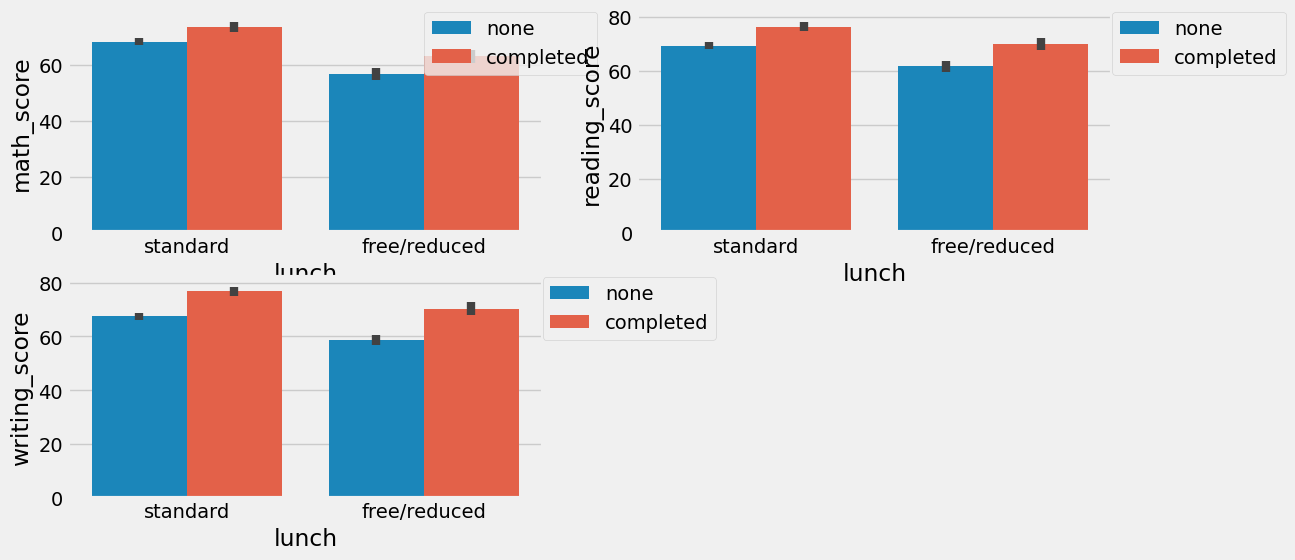

In [89]:
plt.figure(figsize =(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.legend(bbox_to_anchor=(0.75,1),loc=2,borderaxespad=0.)
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.)
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])
plt.legend(bbox_to_anchor=(1,1),loc=2,borderaxespad=0.)

In [77]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


### insights
- students who have completed the test prepration course have scores hifher in all three categories than those wo haven't taken the course 

### checking outliers

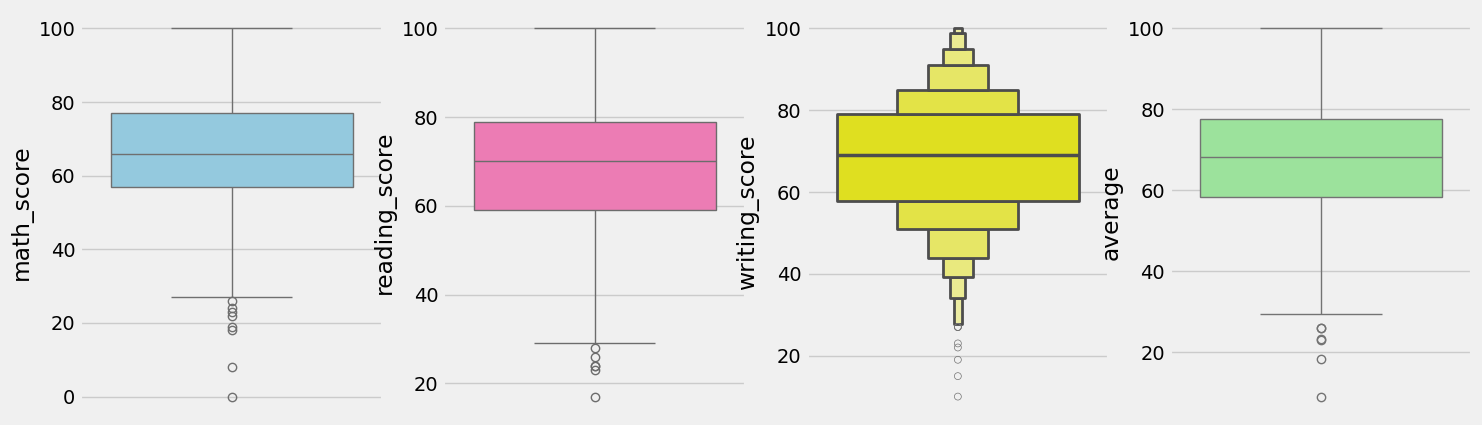

In [92]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxenplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### multivariare analysis using pairplot

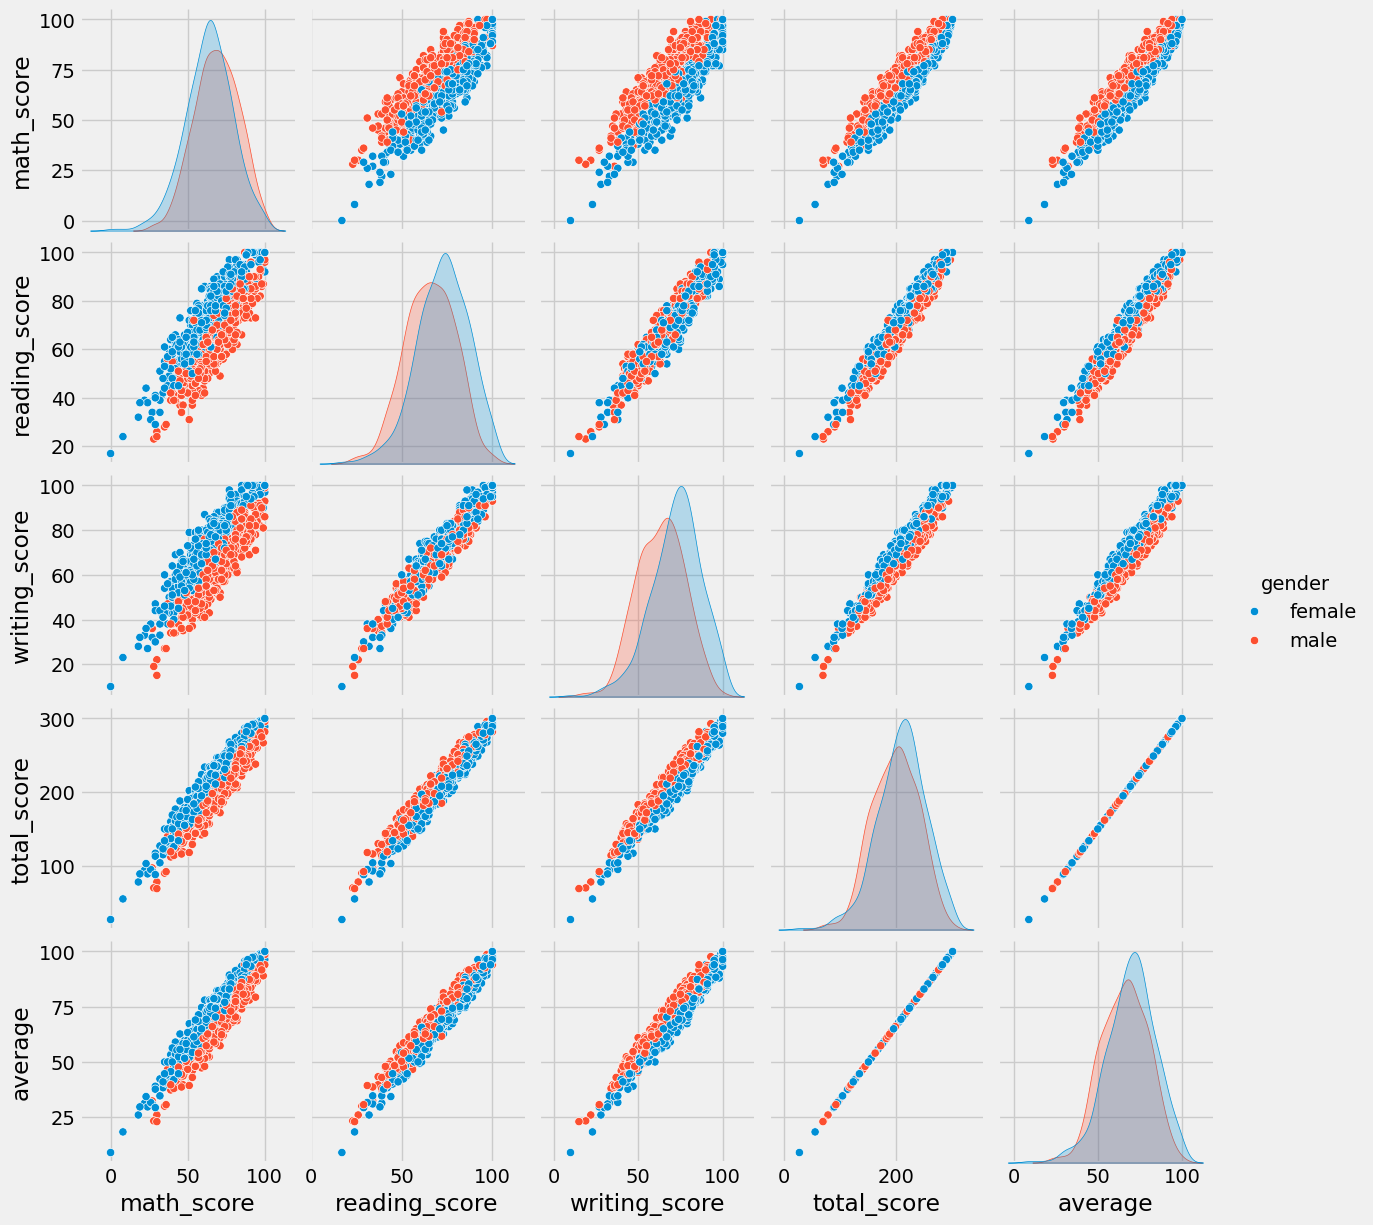

In [93]:
sns.pairplot(df,hue='gender')
plt.show()

### insights
- from the above plot it is clear that all the scores increase linearly each pther 
### conclusions
- student's performance is related with lunch ,race,parental level education
- females lead in pass percentage and alsp are top scorers
- student's preformance is not much related with test prepration course
- finishing preparation course is benfitial